In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
##1.Spatial Aggregation

In [3]:
#1.Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?

In [4]:
file_path = r"C:\Users\yashr\Downloads\Data.csv"
df=pd.read_csv(file_path)
df

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1627456,2024-12-10,"Worli, Mumbai - MPCB",54.71,124.420000,"89-B, NEERI Building, Dr. Annie Besant Road, W...",Mumbai,18.993616,72.812811,Maharashtra
1627457,2024-12-10,"Yamunapuram, Bulandshahr - UPPCB",53.23,101.340000,"F-5, Yamunapuram, Bulandshahr, Near MMR Mall (...",Bulandshahr,28.406963,77.849831,Uttar Pradesh
1627458,2024-12-10,"Yerramukkapalli, Kadapa - APPCB",75.00,110.750000,"Municipal Corporation Office Complex, Railway ...",Kadapa,14.465052,78.824187,Andhra Pradesh
1627459,2024-12-10,"Zero Point GICI, Gangtok - SSPCB",NaN,NaN,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim


In [5]:
#1.
# Convert Timestamp to datetime format
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

# Filtering out rows where PM2.5 or state is missing
df_filtered = df.dropna(subset=["PM2.5", "state"])

state_avg_pm25 = df_filtered.groupby("state")["PM2.5"].mean()
highest_avg_pm25_state = state_avg_pm25.idxmax(), state_avg_pm25.max()
print("State with highest average PM2.5:", highest_avg_pm25_state)

State with highest average PM2.5: ('Delhi', 104.1009176780069)


In [6]:
# Timestamp' column in the DataFrame df to datetime format.
# The errors="coerce" argument ensures that any invalid parsing will be set as NaT (Not a Time).

In [7]:
#2.Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?
df_2023 = df_filtered[df_filtered["Timestamp"].dt.year == 2023]
hazardous_days = df_2023[df_2023["PM2.5"] > 300].groupby("state")["Timestamp"].nunique()
most_hazardous_state = hazardous_days.idxmax(), hazardous_days.max()
print("State with most hazardous days in 2023:", most_hazardous_state)


State with most hazardous days in 2023: ('Delhi', 49)


In [8]:
#3.Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023

state_variability = df_2023.groupby("state")["PM2.5"].std()
highest_variability_state = state_variability.idxmax(), state_variability.max()
print("State with highest PM2.5 variability in 2023:", highest_variability_state)


State with highest PM2.5 variability in 2023: ('Delhi', 82.79710576209911)


In [9]:
#4.Which state has the lowest average PM2.5 levels during the Covid period 
df_covid = df_filtered[df_filtered["Timestamp"].dt.year.isin([2020, 2021])]
state_avg_covid_pm25 = df_covid.groupby("state")["PM2.5"].mean()
lowest_avg_pm25_covid_state = state_avg_covid_pm25.idxmin(), state_avg_covid_pm25.min()
print("State with lowest average PM2.5 in 2020-2021:", lowest_avg_pm25_covid_state)

State with lowest average PM2.5 in 2020-2021: ('Mizoram', 14.323350150801287)


In [10]:
##2.Temporal aggregation

In [11]:
# Convert Timestamp column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Weekday'] = df['Timestamp'].dt.weekday  # 0=Monday, 6=Sunday

In [12]:
#1.Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.
df_aug_2020 = df[(df['Year'] == 2020) & (df['Month'] == 8) & df['PM2.5'].notna()]
highest_pm25_station = df_aug_2020.loc[df_aug_2020['PM2.5'].idxmax(), ['station', 'PM2.5']]
print("Highest PM2.5 Station in Aug 2020:", highest_pm25_station)


Highest PM2.5 Station in Aug 2020: station    Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB
PM2.5                                             805.51
Name: 737399, dtype: object


In [19]:
#2.For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.

stations_2018 = ["Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"]
df_2018 = df[(df['Year'] == 2018) & (df['station'].isin(stations_2018)) & df['PM2.5'].notna()]

def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Summer"
    elif month in [6, 7, 8, 9]:
        return "Monsoon"
    else:
        return "Other"

df_2018["Season"] = df_2018["Month"].apply(get_season)
seasonal_avg_pm25 = df_2018.groupby("Season")["PM2.5"].mean().sort_values(ascending=False)
print("Seasonal Average PM2.5 in 2018:", seasonal_avg_pm25)

Seasonal Average PM2.5 in 2018: Season
Winter     67.492344
Other      56.825144
Monsoon    34.425196
Name: PM2.5, dtype: float64


C:\Users\yashr\AppData\Local\Temp\ipykernel_21872\1526171040.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018["Season"] = df_2018["Month"].apply(get_season)


C:\Users\yashr\AppData\Local\Temp\ipykernel_27372\178033498.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021["DayType"] = df_2021["Weekday"].apply(lambda x: "Weekend" if x >= 5 else "Weekday")


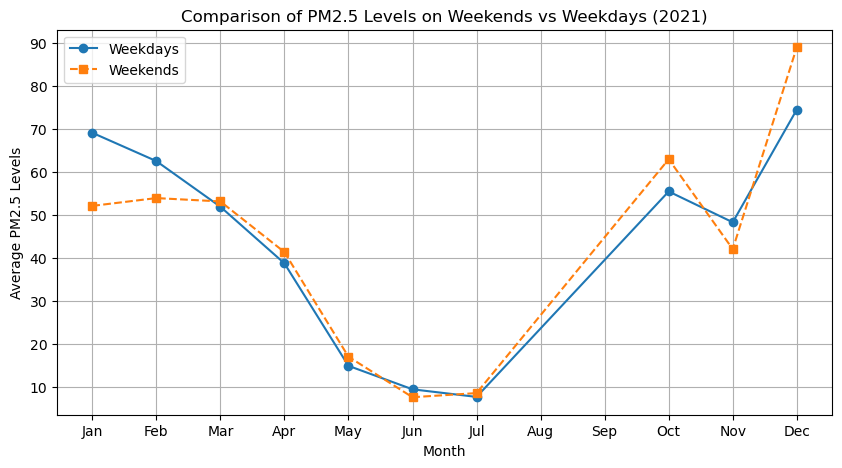

In [13]:
#3. Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:
    # a. Calculate the monthly average PM2.5 for weekdays and weekends separately
    # b. X-axis: Months (January to December).
    # c. Y-axis: Average PM2.5 levels.
    # d. Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.
df_2021 = df[(df['Year'] == 2021) & (df['station'] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB") & df['PM2.5'].notna()]
df_2021["DayType"] = df_2021["Weekday"].apply(lambda x: "Weekend" if x >= 5 else "Weekday")
monthly_avg_pm25 = df_2021.groupby(["Month", "DayType"])["PM2.5"].mean().unstack()

plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_pm25.index, monthly_avg_pm25["Weekday"], marker='o', label="Weekdays", linestyle='-')
plt.plot(monthly_avg_pm25.index, monthly_avg_pm25["Weekend"], marker='s', label="Weekends", linestyle='--')
plt.xlabel("Month")
plt.ylabel("Average PM2.5 Levels")
plt.title("Comparison of PM2.5 Levels on Weekends vs Weekdays (2021)")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.grid(True)
plt.show()


In [14]:
##3. Spatio-temporal aggregation

In [22]:
#1. For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). 
# Which state has the most difference (increase or decrease) for the year 2022?

In [15]:
df=pd.read_csv(r"C:\Users\yashr\Downloads\Data.csv") #location of csv file data (1).csv
df['Timestamp']=pd.to_datetime(df['Timestamp'])
df_2022=df[df['Timestamp'].dt.year==2022]
df_2022_monsoon=df_2022[(df_2022["Timestamp"].dt.month >=6)&(df_2022["Timestamp"].dt.month <=9)]
df_2022_summer=df_2022[(df_2022["Timestamp"].dt.month >=3)&(df_2022["Timestamp"].dt.month <=5)]
df_2022_summer_pm=df_2022_summer.groupby("state")["PM2.5"].mean()
df_2022_monsoon_pm=df_2022_monsoon.groupby("state")["PM2.5"].mean()
percentage_change=(df_2022_monsoon_pm-df_2022_summer_pm)/df_2022_summer_pm*100
print(percentage_change)
max_difference=abs(percentage_change).idxmax()
print(f"The state which has the most difference for the year 2022 {max_difference} and its value is  {percentage_change[max_difference]}")

state
Andhra Pradesh      -35.756894
Arunachal Pradesh   -53.077110
Assam               -61.176419
Bihar               -53.000042
Chandigarh          -45.124242
Chhattisgarh        -10.975330
Delhi               -55.293579
Gujarat             -44.937747
Haryana             -48.704688
Himachal Pradesh    -37.067008
Jammu and Kashmir    -0.003063
Jharkhand                  NaN
Karnataka           -50.498558
Kerala              -14.760499
Madhya Pradesh      -56.251607
Maharashtra         -52.706658
Manipur             -48.441524
Meghalaya           -48.546662
Mizoram             -59.027533
Nagaland            -56.249827
Odisha               -6.712991
Puducherry          -22.623792
Punjab              -37.033255
Rajasthan           -46.594606
Sikkim              -51.805275
Tamil Nadu          -17.987205
Telangana           -50.160366
Tripura             -56.657734
Uttar Pradesh       -52.979157
Uttarakhand         -49.964699
West Bengal         -53.496777
Name: PM2.5, dtype: float64
The s

In [16]:
#2. Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023.
# What seasonal variation, if any, can you observe in pollution levels?

C:\Users\yashr\AppData\Local\Temp\ipykernel_21872\1207797259.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delhi['Year'] = df_delhi['Timestamp'].dt.year
C:\Users\yashr\AppData\Local\Temp\ipykernel_21872\1207797259.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delhi['Month'] = df_delhi['Timestamp'].dt.month


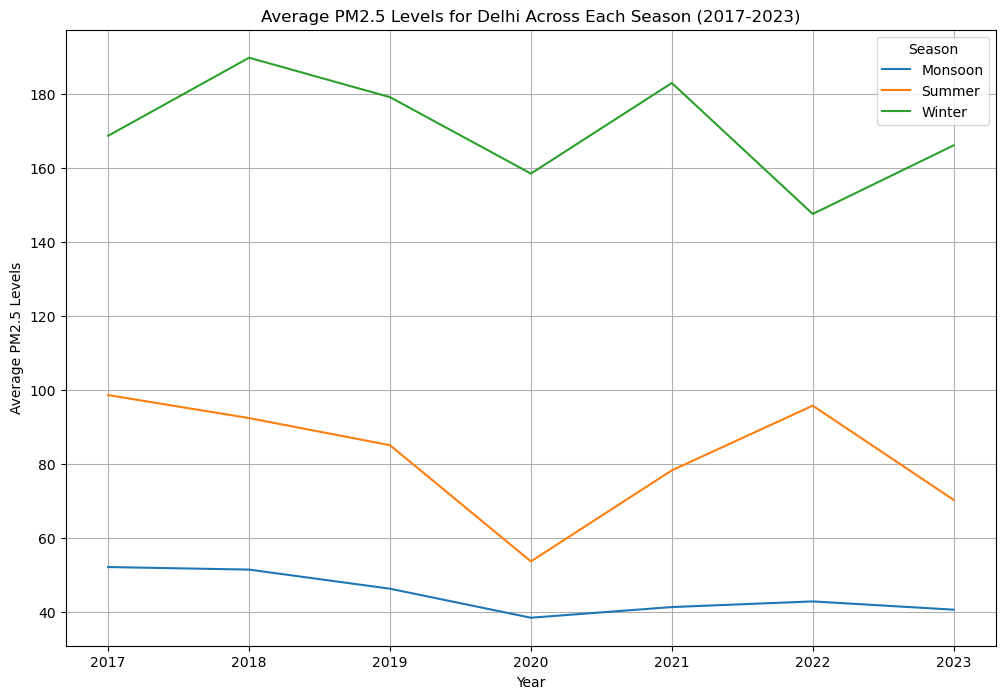

Season    Monsoon     Summer      Winter
Year                                    
2017    52.058519  98.525562  168.601736
2018    51.366940  92.307981  189.692843
2019    46.200330  84.982546  179.034521
2020    38.362705  53.583184  158.383736
2021    41.243770  78.184788  182.867699
2022    42.769572  95.667628  147.476104
2023    40.538087  70.216212  166.011412


In [64]:
df = pd.read_csv(r"C:\Users\yashr\Downloads\Data.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_delhi = df[(df['city'].str.lower() == 'delhi')]
df_delhi['Year'] = df_delhi['Timestamp'].dt.year
df_delhi['Month'] = df_delhi['Timestamp'].dt.month
df_delhi_monsoon = df_delhi[(df_delhi["Timestamp"].dt.month >= 6) & (df_delhi['Timestamp'].dt.month <= 9) & (df_delhi["Timestamp"].dt.year >= 2017) & (df_delhi["Timestamp"].dt.year <= 2023)]
df_delhi_summer = df_delhi[(df_delhi["Timestamp"].dt.month >= 3) & (df_delhi['Timestamp'].dt.month <= 5) & (df_delhi["Timestamp"].dt.year >= 2017) & (df_delhi["Timestamp"].dt.year <= 2023)]
df_delhi_winter = df_delhi[((df_delhi["Timestamp"].dt.month == 12) | (df_delhi["Timestamp"].dt.month <= 2)) & (df_delhi["Timestamp"].dt.year >= 2017) & (df_delhi["Timestamp"].dt.year <= 2023)]
seasonal_avg_pm25 = pd.concat([
    df_delhi_winter.groupby('Year')['PM2.5'].mean().reset_index().assign(Season='Winter'),
    df_delhi_summer.groupby('Year')['PM2.5'].mean().reset_index().assign(Season='Summer'),
    df_delhi_monsoon.groupby('Year')['PM2.5'].mean().reset_index().assign(Season='Monsoon')
])

seasonal_avg_pm25_pivot = seasonal_avg_pm25.pivot(index='Year', columns='Season', values='PM2.5')
plt.figure(figsize=(12, 8))
for season in seasonal_avg_pm25_pivot.columns:
    plt.plot(seasonal_avg_pm25_pivot.index, seasonal_avg_pm25_pivot[season], label=season)
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Levels')
plt.title('Average PM2.5 Levels for Delhi Across Each Season (2017-2023)')
plt.legend(title='Season')
plt.grid(True)
plt.show()

# Print the seasonal average PM2.5 DataFrame for reference
print(seasonal_avg_pm25_pivot)
plt.show()

In [17]:
#3.Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2017 to 2023. 
#Which city had more fluctuations? (Hint: Think what fluctuation means)

C:\Users\yashr\AppData\Local\Temp\ipykernel_21872\2586816770.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delhi['PM2.5'] = df_delhi['PM2.5'].fillna(df_delhi['PM2.5'].mean())
C:\Users\yashr\AppData\Local\Temp\ipykernel_21872\2586816770.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mumbai['PM2.5'] = df_mumbai['PM2.5'].fillna(df_mumbai['PM2.5'].mean())


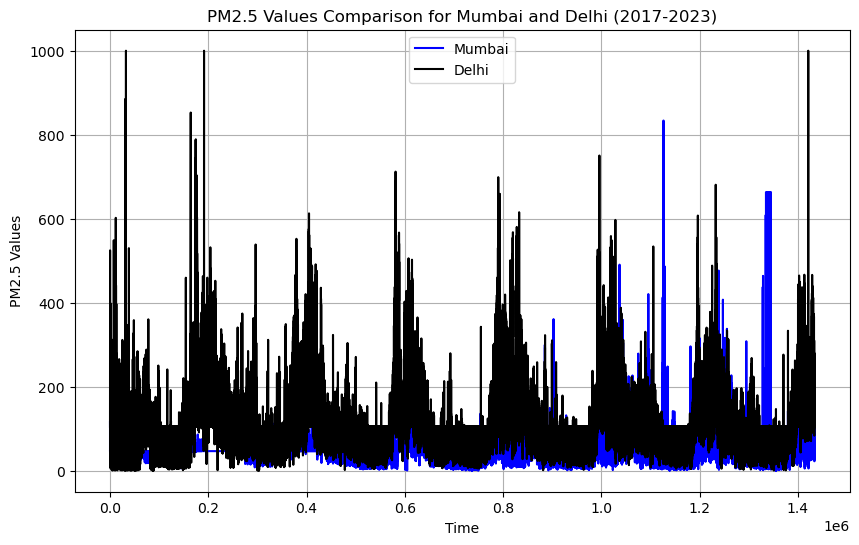

In [27]:
df = pd.read_csv(r"C:\Users\yashr\Downloads\Data.csv") #location of csv file data (1).csv
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df_delhi = df[(df["Timestamp"].dt.year <= 2023) & (df['city'].str.lower() == 'delhi')]
df_mumbai = df[(df["Timestamp"].dt.year <= 2023) & (df['city'].str.lower() == 'mumbai')] 

# Handle NaN values (choose one of the methods below)
# Fill NaN values with the mean of the PM2.5 column 
df_delhi['PM2.5'] = df_delhi['PM2.5'].fillna(df_delhi['PM2.5'].mean())
df_mumbai['PM2.5'] = df_mumbai['PM2.5'].fillna(df_mumbai['PM2.5'].mean())
df_mumbai_pm = df_mumbai['PM2.5'].to_numpy()
df_delhi_pm = df_delhi['PM2.5'].to_numpy()
df_mumbai_index = df_mumbai.index
df_delhi_index = df_delhi.index
plt.figure(figsize=(10, 6))
plt.plot(df_mumbai_index, df_mumbai_pm, color='blue', label='Mumbai')
plt.plot(df_delhi_index, df_delhi_pm, color='black', label='Delhi')
plt.xlabel("Time")
plt.ylabel("PM2.5 Values")
plt.title("PM2.5 Values Comparison for Mumbai and Delhi (2017-2023)")
plt.legend()
plt.grid(True)
plt.show()

In [28]:
##4.Population Based

In [29]:
#1. Which state in India has the highest number of monitoring stations relative to its population? 

In [18]:
df_station = pd.read_csv(r"C:\Users\yashr\Downloads\Data.csv")  #location of csv file data (1).csv
df_population = pd.read_csv(r"C:\Users\yashr\Downloads\State_data.csv")  #location of csv file State_data.csv
df_population['state'] = df_population['State']
monitoring_stations_count = df_station['state'].value_counts()
df_monitoring_stations = monitoring_stations_count.reset_index()
df_monitoring_stations.columns = ['state', 'count']
df_merge = pd.merge(df_monitoring_stations, df_population, on='state')
df_merge['monitoring_stations_relative_to_population'] = df_merge['count'] / df_merge['Population']

# Identify the state with the highest number of stations relative to its population
highest_station_index = df_merge['monitoring_stations_relative_to_population'].idxmax()
highest_station = df_merge.loc[highest_station_index]

print(f"State with the highest monitoring stations relative to its population is {highest_station['state']}.")
print(f"Stations relative to population: {highest_station['monitoring_stations_relative_to_population']}")

State with the highest monitoring stations relative to its population is Chandigarh.
Stations relative to population: 0.008245771945615614


In [19]:
#2. Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.

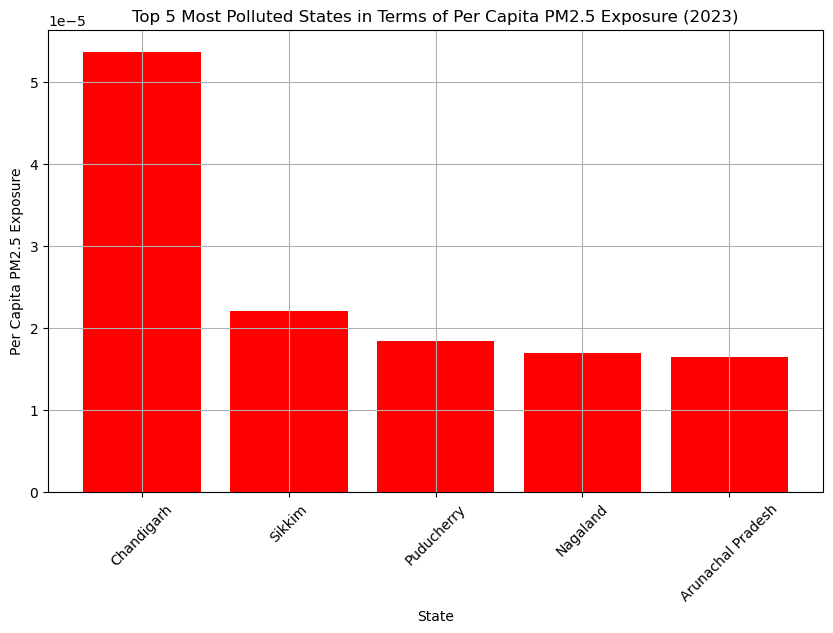

In [21]:
df_state=pd.read_csv(r"C:\Users\yashr\Downloads\State_data.csv")
df_pollution=pd.read_csv(r"C:\Users\yashr\Downloads\Data.csv")
df_state['state']=df_state['State']
df_pollution["Timestamp"]=pd.to_datetime(df_pollution["Timestamp"])
df_2023=df_pollution[df_pollution["Timestamp"].dt.year==2023]
df_2023_pm_count=df_2023['state'].value_counts()
df_2023_pm=df_2023_pm_count.reset_index()
df_2023_pm.columns=['state','count']
df_state_pm_mean=df_pollution.groupby('state')['PM2.5'].mean().reset_index()
df_state_pm_mean.columns = ['state', 'mean_PM2.5']
df_merge=pd.merge(df_state_pm_mean,df_2023_pm,on='state')
df_Merge=pd.merge(df_merge,df_state,on='state')
df_Merge['PM2.5 per capita']=df_Merge['mean_PM2.5']/df_Merge['Population']
top_5_states = df_Merge.nlargest(5,'PM2.5 per capita')
plt.figure(figsize=(10, 6))
plt.bar(top_5_states['state'], top_5_states['PM2.5 per capita'], color='red')
plt.xlabel('State')
plt.ylabel('Per Capita PM2.5 Exposure')
plt.title('Top 5 Most Polluted States in Terms of Per Capita PM2.5 Exposure (2023)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [22]:
#3. Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?
# X-axis: Population density (people per square kilometer).
# Y-axis: Average PM2.5 concentration.
# Use a scatter plot to show the relationship, where each point represents a state.

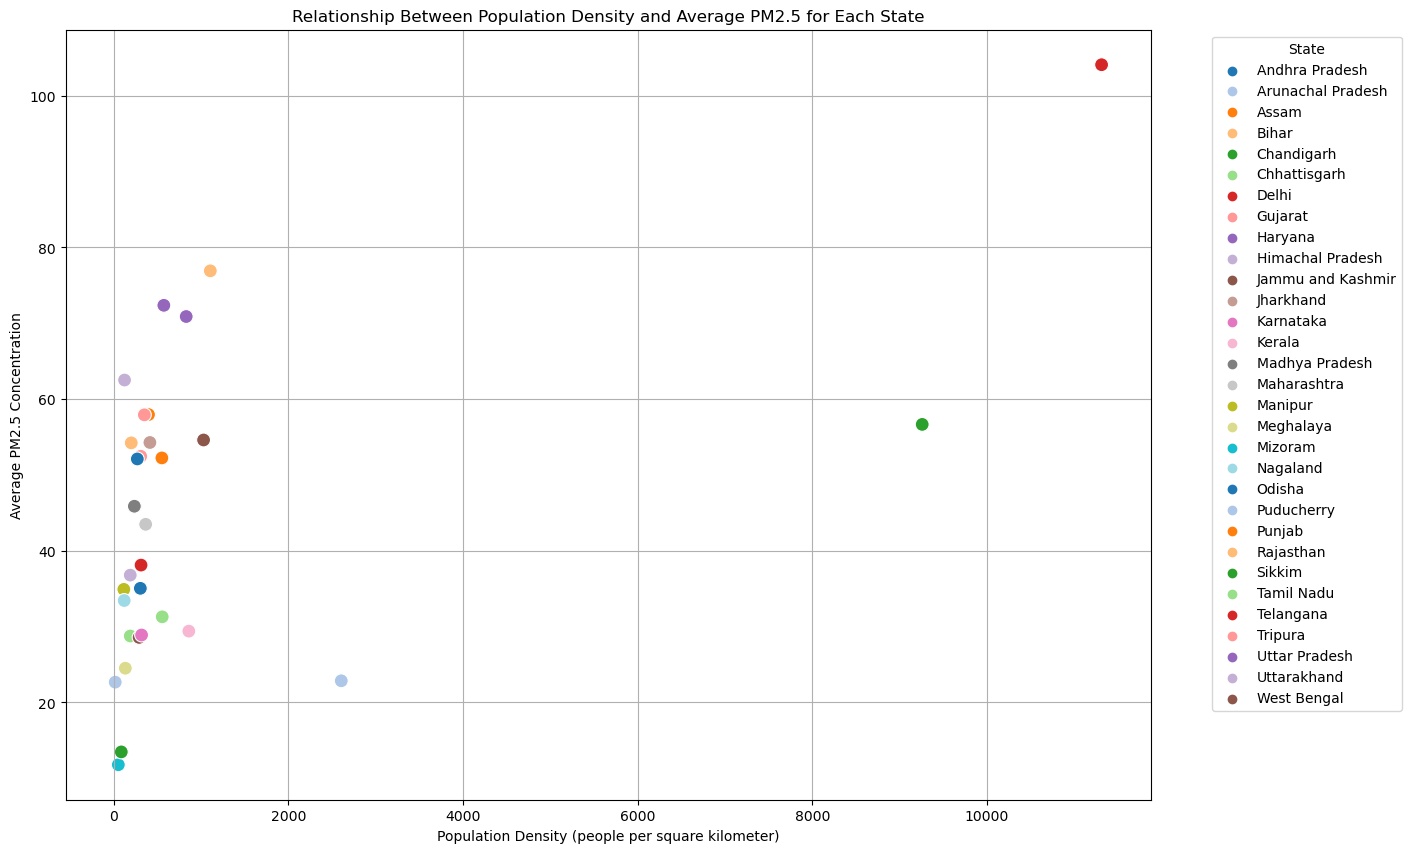

In [23]:
import seaborn as sns
df_state = pd.read_csv(r"C:\Users\yashr\Downloads\State_data.csv")  # location of state_data.csv file
df_pollution = pd.read_csv(r"C:\Users\yashr\Downloads\Data.csv")    # location of Data.csv
df_state['Population density'] = df_state['Population'] / df_state['Area (km2)']
df_state['state'] = df_state["State"]
df_pm_a = df_pollution.groupby('state')['PM2.5'].mean().reset_index()
df_pm_a.columns = ['state', 'Average_PM2.5']
df_merge = pd.merge(df_pm_a, df_state, on='state')
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df_merge, x='Population density', y='Average_PM2.5', hue='state', palette='tab20', s=100)
plt.xlabel('Population Density (people per square kilometer)')
plt.ylabel('Average PM2.5 Concentration')
plt.title('Relationship Between Population Density and Average PM2.5 for Each State')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [24]:
##5. Area-based 

In [25]:
#1. Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.
# X-axis: States.
# Y-axis: PM2.5 concentration per square kilometer.
# Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.

State with highest PM2.5 concentration per square kilometer: Chandigarh (0.497077 µg/m³ per km²)


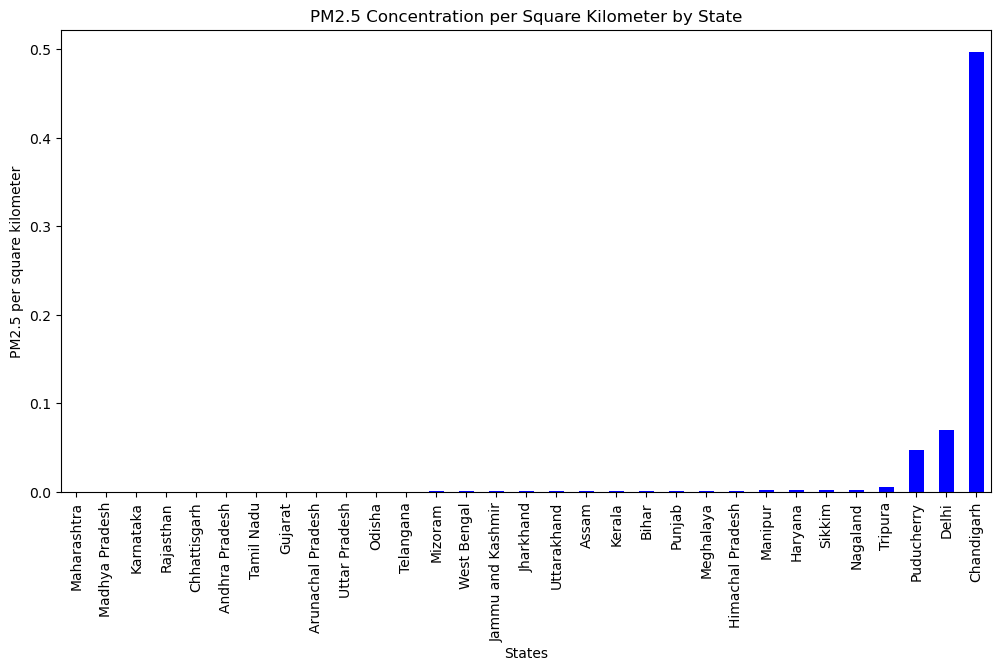

In [26]:
df1=pd.read_csv(r"C:\Users\yashr\Downloads\State_data.csv")
state_avg_pm25 = df.groupby('state')['PM2.5'].mean()
state_area = df1.set_index('State')['Area (km2)']

common_states = state_avg_pm25.index.intersection(state_area.index)
pm25_per_sq_km = state_avg_pm25.loc[common_states] / state_area.loc[common_states]

highest_pm25_state = pm25_per_sq_km.idxmax()
highest_pm25_value = pm25_per_sq_km.max()

print(f"State with highest PM2.5 concentration per square kilometer: {highest_pm25_state} ({highest_pm25_value:.6f} µg/m³ per km²)")

plt.figure(figsize=(12, 6))
pm25_per_sq_km.sort_values().plot(kind='bar', color='blue')
plt.xlabel('States')
plt.ylabel('PM2.5 per square kilometer')
plt.title('PM2.5 Concentration per Square Kilometer by State')
plt.show()

In [27]:
#2. Compare the total number of monitoring stations per square kilometer in each state. 
# Identify the state with the highest density of monitoring stations relative to its area. 
#Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.

State with highest monitoring station density: Delhi (0.026954 stations per km²)


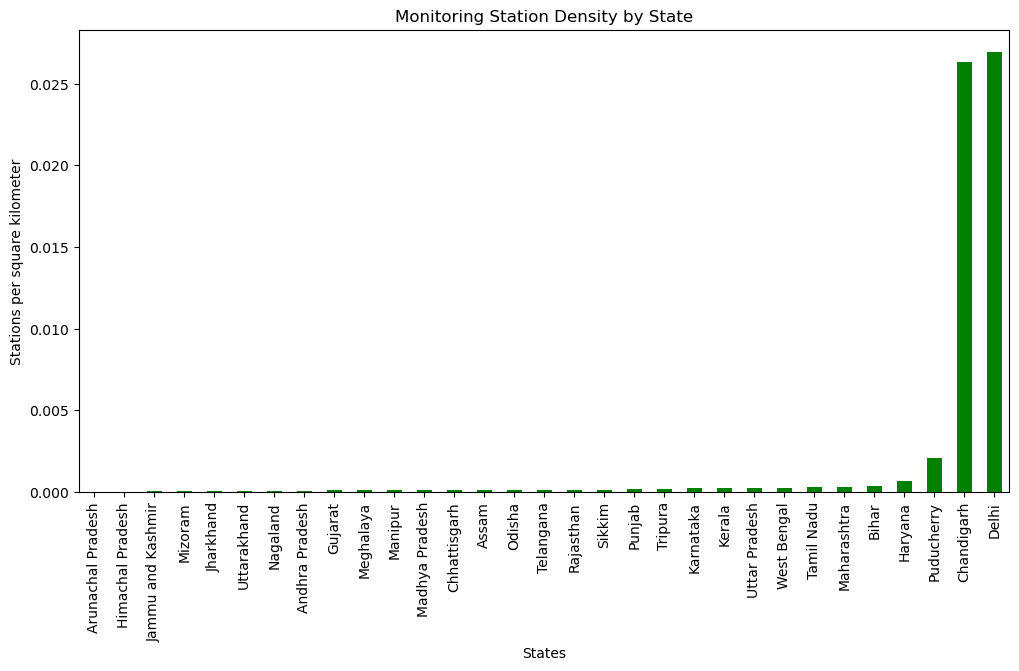

In [29]:
station_counts = df.groupby('state')['station'].nunique()

common_states_stations = station_counts.index.intersection(state_area.index)
station_density = station_counts.loc[common_states_stations] / state_area.loc[common_states_stations]

highest_station_density_state = station_density.idxmax()
highest_station_density_value = station_density.max()

print(f"State with highest monitoring station density: {highest_station_density_state} ({highest_station_density_value:.6f} stations per km²)")

plt.figure(figsize=(12, 6))
station_density.sort_values().plot(kind='bar', color='green')
plt.xlabel('States')
plt.ylabel('Stations per square kilometer')
plt.title('Monitoring Station Density by State')
plt.show()

In [30]:
#3. Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. 
# Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states

Maharashtra - Avg PM2.5 (2021): 46.44 µg/m³, Population Density: 365.19 people/km²
Madhya Pradesh - Avg PM2.5 (2021): 47.10 µg/m³, Population Density: 235.61 people/km²


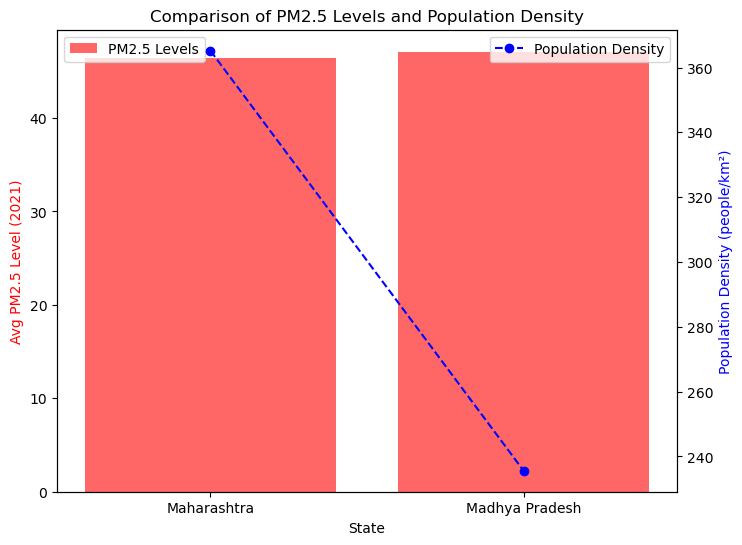

In [31]:
data_2021 = df[df['Timestamp'].dt.year == 2021]
maharashtra_pm25 = data_2021[data_2021['state'] == 'Maharashtra']['PM2.5'].mean()
mp_pm25 = data_2021[data_2021['state'] == 'Madhya Pradesh']['PM2.5'].mean()

state_population = df1.set_index('State')['Population']
population_density = state_population / state_area

maharashtra_density = population_density['Maharashtra']
mp_density = population_density['Madhya Pradesh']

print(f"Maharashtra - Avg PM2.5 (2021): {maharashtra_pm25:.2f} µg/m³, Population Density: {maharashtra_density:.2f} people/km²")
print(f"Madhya Pradesh - Avg PM2.5 (2021): {mp_pm25:.2f} µg/m³, Population Density: {mp_density:.2f} people/km²")

states = ['Maharashtra', 'Madhya Pradesh']
pm25_levels = [maharashtra_pm25, mp_pm25]
densities = [maharashtra_density, mp_density]

fig, ax1 = plt.subplots(figsize=(8, 6))

ax2 = ax1.twinx()
ax1.bar(states, pm25_levels, color='red', alpha=0.6, label='PM2.5 Levels')
ax2.plot(states, densities, color='blue', marker='o', linestyle='dashed', label='Population Density')

ax1.set_xlabel('State')
ax1.set_ylabel('Avg PM2.5 Level (2021)', color='red')
ax2.set_ylabel('Population Density (people/km²)', color='blue')
plt.title('Comparison of PM2.5 Levels and Population Density')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

In [32]:
##6.Funding Based 

In [33]:
#1.Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.

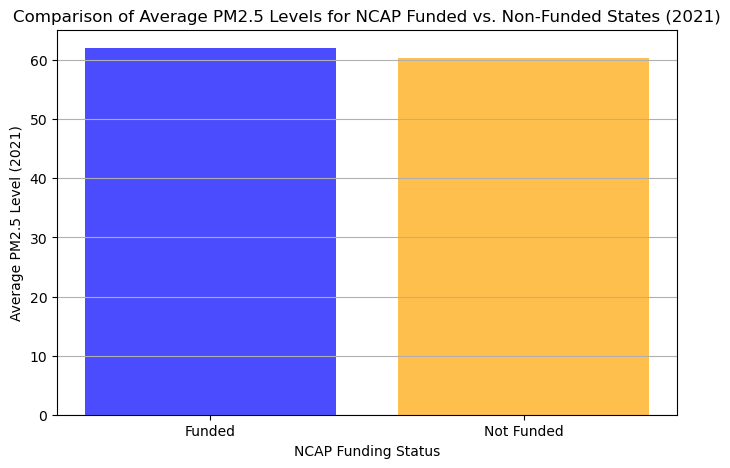

  NCAP_Funded      PM2.5
0      Funded  62.055055
1  Not Funded  60.326211


In [34]:
import pandas as pd
import matplotlib.pyplot as plt

air_quality_df = pd.read_csv(r"C:\Users\yashr\Downloads\Data.csv", parse_dates=['Timestamp'])
population_df = pd.read_csv(r"C:\Users\yashr\Downloads\State_data.csv")  
ncap_funding_df = pd.read_csv(r"C:\Users\yashr\Downloads\NCAP_Funding.csv") 
 
air_quality_df = air_quality_df[air_quality_df['Timestamp'].dt.year == 2021]
ncap_states = ncap_funding_df['State'].unique()
air_quality_df['NCAP_Funded'] = air_quality_df['state'].apply(lambda x: 'Funded' if x in ncap_states else 'Not Funded')
pm25_avg = air_quality_df.groupby('NCAP_Funded')['PM2.5'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(pm25_avg['NCAP_Funded'], pm25_avg['PM2.5'], color=['blue', 'orange'], alpha=0.7)
plt.xlabel('NCAP Funding Status')
plt.ylabel('Average PM2.5 Level (2021)')
plt.title('Comparison of Average PM2.5 Levels for NCAP Funded vs. Non-Funded States (2021)')
plt.grid(axis='y')
plt.show()

print(pm25_avg)

In [35]:
#2.Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam.
# Has an increment of the financing led to noticeable improvements in air quality?

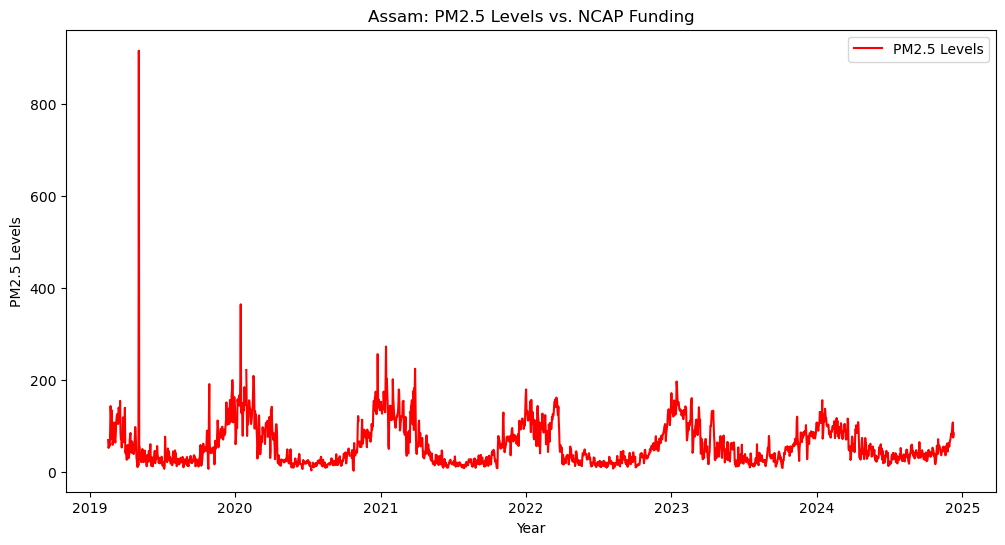

In [36]:
data_assam = df[df['state'] == 'Assam'].groupby('Timestamp')['PM2.5'].mean()
funding_assam = ncap_funding_df[ncap_funding_df['State'] == 'Assam'].set_index('State')

plt.figure(figsize=(12, 6))
plt.plot(data_assam.index, data_assam, label='PM2.5 Levels', color='red')
plt.xlabel('Year')
plt.ylabel('PM2.5 Levels')
plt.title('Assam: PM2.5 Levels vs. NCAP Funding')
plt.legend()
plt.show()

In [37]:
#3.Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color
# and show the legend outside the plot

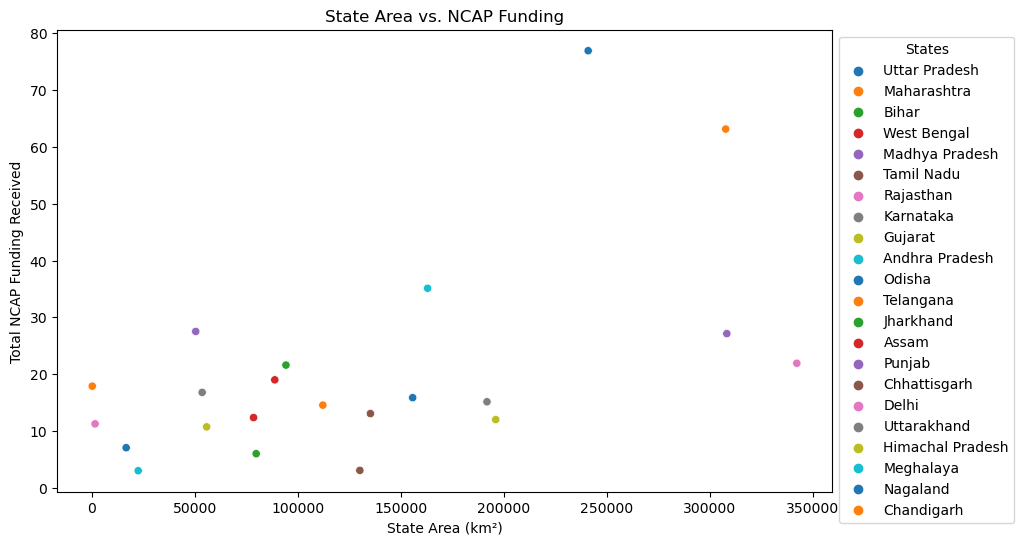

In [53]:
funding_total = ncap_funding_df.groupby('State')['Total fund released'].sum()
state_area = df1.set_index('State')['Area (km2)']

common_states_funding = state_area.index.intersection(funding_total.index)
funding_total = funding_total.loc[common_states_funding]
state_area = state_area.loc[common_states_funding]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=state_area, y=funding_total, hue=common_states_funding, palette='tab10')
plt.xlabel('State Area (km²)')
plt.ylabel('Total NCAP Funding Received')
plt.title('State Area vs. NCAP Funding')
plt.legend(title='States', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
##7.Miscellaneous Questions

In [ ]:
#1. For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)

In [39]:
import pandas as pd
file_path = r"C:\Users\yashr\Downloads\Data.csv"
df=pd.read_csv(file_path)
# Convert the 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
data_2023 = df[df['Timestamp'].dt.year == 2023]
city_avg_pm25_2023 = data_2023.groupby('city')['PM2.5'].mean()
most_polluted_city = city_avg_pm25_2023.idxmax()

city_data = data_2023[data_2023['city'] == most_polluted_city]
hazardous_days = (city_data['PM2.5'] > 300).sum()
total_days = city_data['Timestamp'].nunique()
hazardous_percentage = (hazardous_days / total_days) * 100

print(f"Most polluted city in 2023: {most_polluted_city}")
print(f"Percentage of days with PM2.5 > 300 µg/m³: {hazardous_percentage:.2f}%")

Most polluted city in 2023: Darbhanga
Percentage of days with PM2.5 > 300 µg/m³: 0.82%


In [40]:
#2. Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). 
#Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?

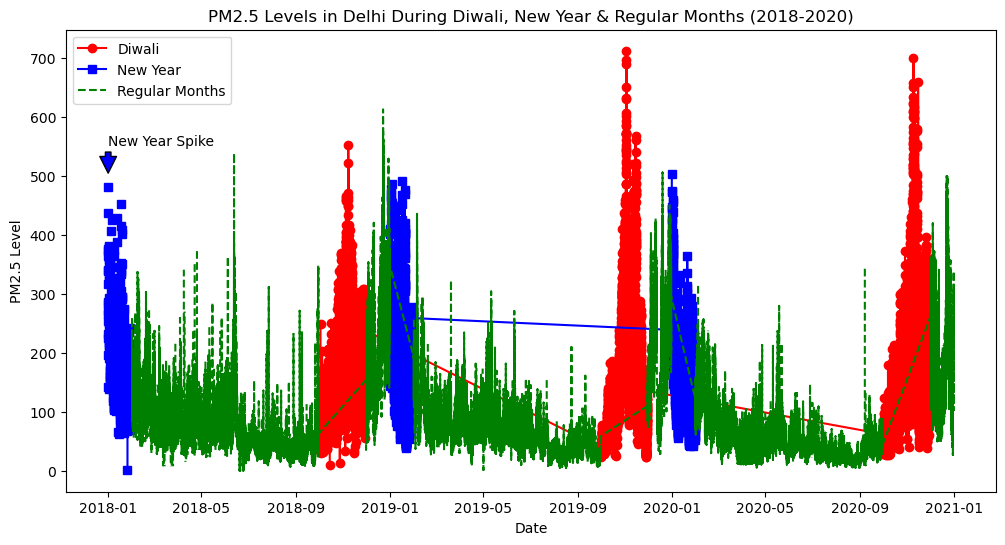

In [41]:
diwali_months = [10, 11]  # October, November
new_year_month = [1]  # January
# Convert the 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
delhi_data = df[(df['city'] == 'Delhi') & (df['Timestamp'].dt.year.isin([2018, 2019, 2020]))]

delhi_diwali = delhi_data[delhi_data['Timestamp'].dt.month.isin(diwali_months)]
delhi_new_year = delhi_data[delhi_data['Timestamp'].dt.month.isin(new_year_month)]
delhi_regular = delhi_data[~delhi_data['Timestamp'].dt.month.isin(diwali_months + new_year_month)]

plt.figure(figsize=(12, 6))
plt.plot(delhi_diwali['Timestamp'], delhi_diwali['PM2.5'], label='Diwali', color='red', marker='o')
plt.plot(delhi_new_year['Timestamp'], delhi_new_year['PM2.5'], label='New Year', color='blue', marker='s')
plt.plot(delhi_regular['Timestamp'], delhi_regular['PM2.5'], label='Regular Months', color='green', linestyle='dashed')

plt.annotate('New Year Spike', xy=(delhi_new_year['Timestamp'].iloc[0], delhi_new_year['PM2.5'].max()), 
             xytext=(delhi_new_year['Timestamp'].iloc[0], delhi_new_year['PM2.5'].max() + 50), 
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.xlabel("Date")
plt.ylabel("PM2.5 Level")
plt.title("PM2.5 Levels in Delhi During Diwali, New Year & Regular Months (2018-2020)")
plt.legend()
plt.show()

In [42]:
#3. Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. 
#Use a line graph to compare yearly average PM2.5 trends

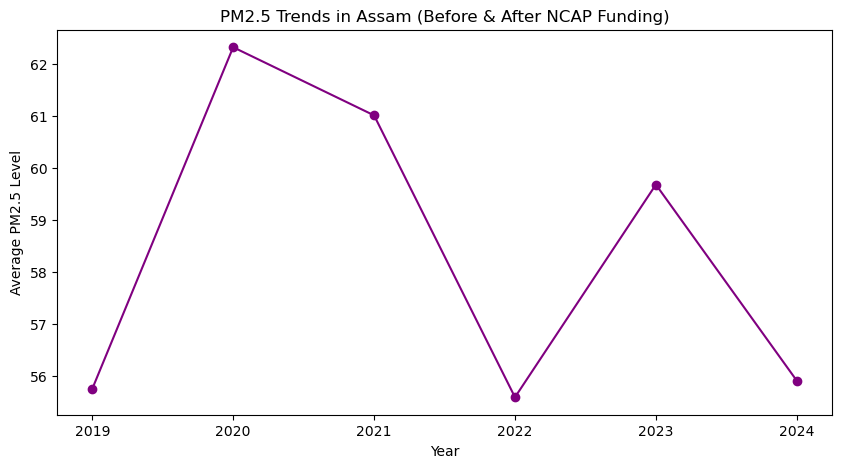

In [43]:
funding_2020 = ncap_funding_df[['State', 'Amount released during FY 2020-21']].dropna()
highest_funded_state = funding_2020.iloc[funding_2020['Amount released during FY 2020-21'].idxmax()]['State']
# Convert the 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
state_pm25_trend = df[df['state'] == highest_funded_state].groupby(df['Timestamp'].dt.year)['PM2.5'].mean()

plt.figure(figsize=(10, 5))
plt.plot(state_pm25_trend.index, state_pm25_trend, marker='o', linestyle='-', color='purple')
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Level")
plt.title(f"PM2.5 Trends in {highest_funded_state} (Before & After NCAP Funding)")
plt.show()

In [44]:
#4. Draw the map of India and plot the sensor locations on the map

In [45]:
pip install cartopy

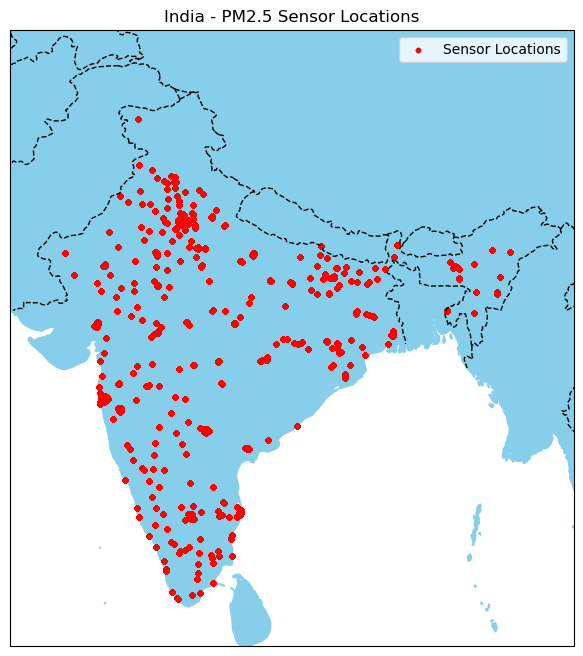

In [47]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load data
data_df = pd.read_csv("data.csv").rename(columns={"Latitude": "latitude", "Longitude": "longitude"})

# Filter valid sensor locations
sensor_locations = data_df.dropna(subset=["latitude", "longitude"])

# Plot India map with sensor locations
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.BORDERS, linestyle="--", linewidth=1)
ax.add_feature(cfeature.LAND, color="skyblue")
ax.set_extent([68, 98, 6, 38])

# Plot sensor locations
ax.scatter(sensor_locations["longitude"], sensor_locations["latitude"], color="red", s=10, label="Sensor Locations")
plt.title("India - PM2.5 Sensor Locations")
plt.legend()
plt.show()

In [ ]:
## Tell us something new
#Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers.

In [ ]:
# There are many states which are given so much of funds but their pollution is not under control this is due to corruption factor in that states. 
# On the other hand there are some states which are given small funds but they used it efficiently and their pollution is low. 